# SUPPORT VECTOR MACHINES
A support vector machine (SVM) is a powerful and versatile machine learning model, capable of performing linear or nonlinear classification, regression, and even novelty detection. SVMs shine with small to medium-sized nonlinear datasets (i.e., hundreds to thousands of instances), especially for classification tasks. However, they don’t scale very well to very large datasets, as you will see.

# LINEAR SVM CLASSIFICATION
The fundamental idea behind SVMs is best explained with some visuals. Figure 5-1 shows part of the iris dataset that was introduced at the end of Chapter 4. The two classes can clearly be separated easily with a straight line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifiers. The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly. The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances. In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible. You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. This is called large margin classification.

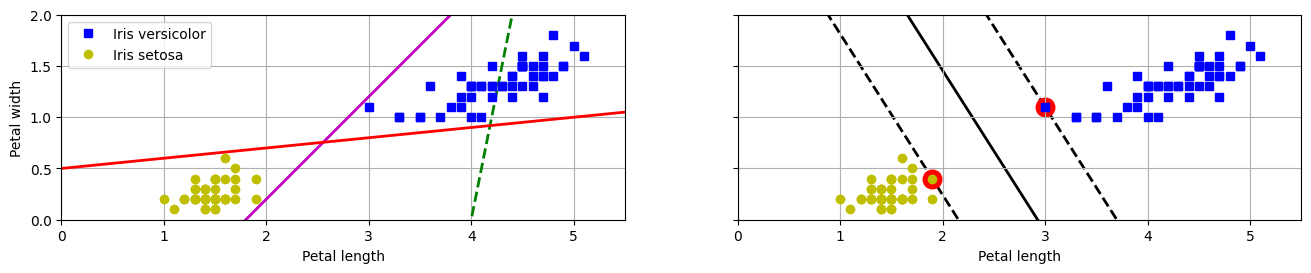

In [683]:
# extra code – this cell generates and saves Figure 5–1
# it is not necessary to dig deep into this code; it just generates the figure. Dig into it only if interested.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FF0000',
                zorder=-1)


fig, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis((0, 5.5, 0, 2))
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("Petal length")
plt.axis((0, 5.5, 0, 2))
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the support vectors (they are circled in Figure 5-1).

WARNING
SVMs are sensitive to the feature scales, as you can see in Figure 5-2. In the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s StandardScaler), the decision boundary in the right plot looks much better.

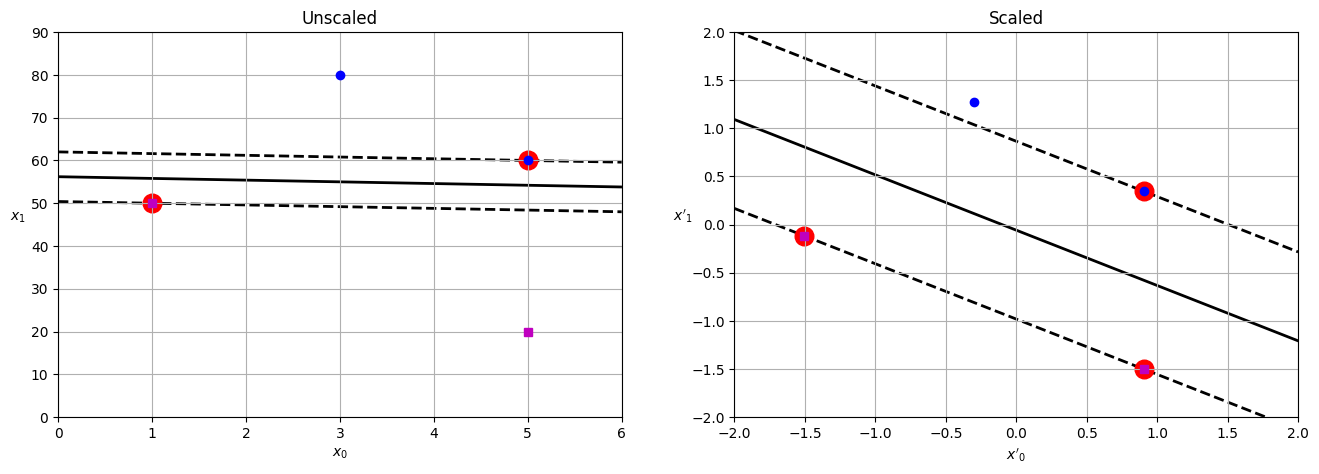

In [684]:
# extra code – this cell generates and saves Figure 5–2

from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis((0, 6, 0, 90))
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "bo")
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis((-2, 2, -2, 2))
plt.grid()

plt.show()

# SOFT MARGIN CLASSIFICATION
If we strictly impose that all instances must be off the street and on the correct side, this is called hard margin classification. There are two main issues with hard margin classification. First, it only works if the data is linearly separable. Second, it is sensitive to outliers. Figure 5-3 shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin; on the right, the decision boundary ends up very different from the one we saw in Figure 5-1 without the outlier, and the model will probably not generalize as well.

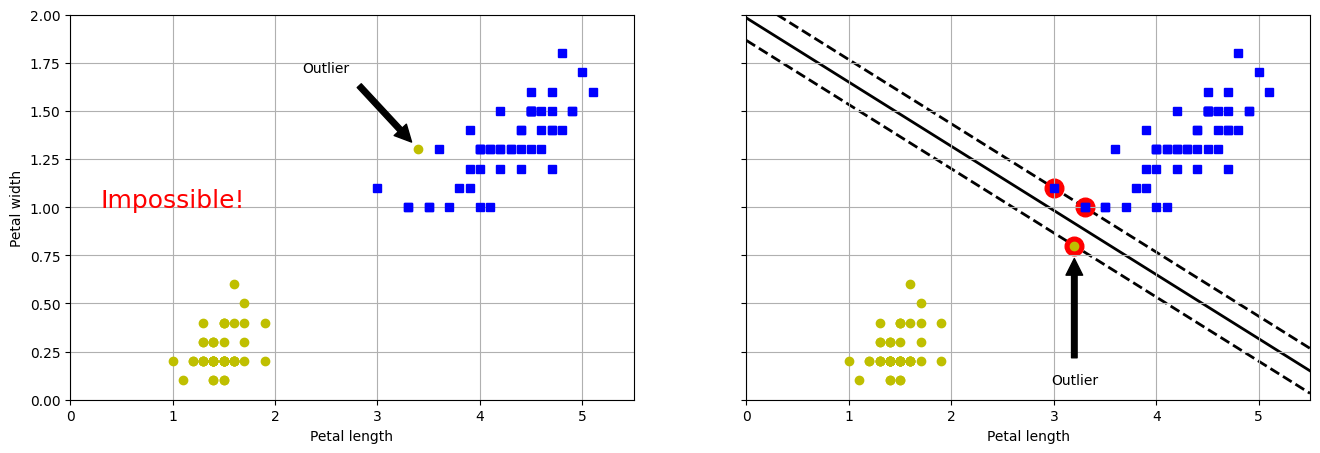

In [685]:
# extra code – this cell generates and saves Figure 5–3

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10 ** 9)
svm_clf2.fit(Xo2, yo2)

_, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis((0, 5.5, 0, 2))
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2 == 1], Xo2[:, 1][yo2 == 1], "bs")
plt.plot(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis((0, 5.5, 0, 2))
plt.grid()

plt.show()

To avoid these issues, we need to use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called soft margin classification.

When creating an SVM model using Scikit-Learn, you can specify several hyperparameters, including the regularization hyperparameter C. If you set it to a low value, then you end up with the model on the left of Figure 5-4. With a high value, you get the model on the right. As you can see, reducing C makes the street larger, but it also leads to more margin violations. In other words, reducing C results in more instances supporting the street, so there’s less risk of overfitting. But if you reduce it too much, then the model ends up underfitting, as seems to be the case here: the model with C=100 looks like it will generalize better than the one with C=1.

Note: the default value for the dual hyperparameter of the LinearSVC and LinearSVR estimators will change from True to "auto" in Scikit-Learn 1.4, so I set dual=True throughout this notebook to ensure the output of this notebook remains unchanged.

The following Scikit-Learn code loads the iris dataset and trains a linear SVM classifier to detect Iris virginica flowers. The pipeline first scales the features, then uses a LinearSVC with C=1:

In [686]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

The resulting model is represented on the Figure 5-4.

Then, as usual, you can use the model to make predictions:


In [687]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

The first plant is classified as an Iris virginica, while the second is not. Let’s look at the scores that the SVM used to make these predictions. These measure the signed distance between each instance and the decision boundary:

In [688]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

Unlike LogisticRegression, LinearSVC doesn’t have a predict_proba() method to estimate the class probabilities. That said, if you use the SVC class (discussed shortly) instead of LinearSVC, and if you set its probability hyperparameter to True, then the model will fit an extra model at the end of training to map the SVM decision function scores to estimated probabilities. Under the hood, this requires using 5-fold cross-validation to generate out-of-sample predictions for every instance in the training set, then training a LogisticRegression model, so it will slow down training considerably. After that, the predict_proba() and predict_log_proba() methods will be available.

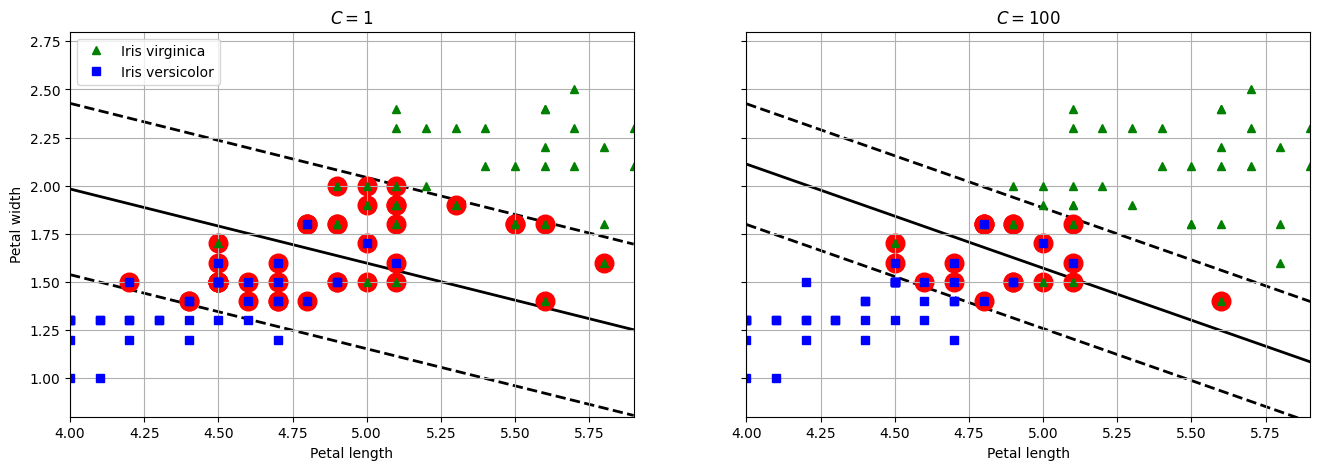

In [689]:
# extra code – this cell generates and saves Figure 5–4

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).to_numpy()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).to_numpy()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

_, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis((4, 5.9, 0.8, 2.8))
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis((4, 5.9, 0.8, 2.8))
plt.grid()

plt.show()

TIP
If your SVM model is overfitting, you can try regularizing it by reducing C.

# NONLINEAR SVM CLASSIFICATION
Although linear SVM classifiers are efficient and often work surprisingly well, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features (as we did in Chapter 4); in some cases this can result in a linearly separable dataset. Consider the lefthand plot in Figure 5-5: it represents a simple dataset with just one feature, $x_1$. This dataset is not linearly separable, as you can see. But if you add a second feature $x_2$ = $(x_1)^2$, the resulting 2D dataset is perfectly linearly separable.

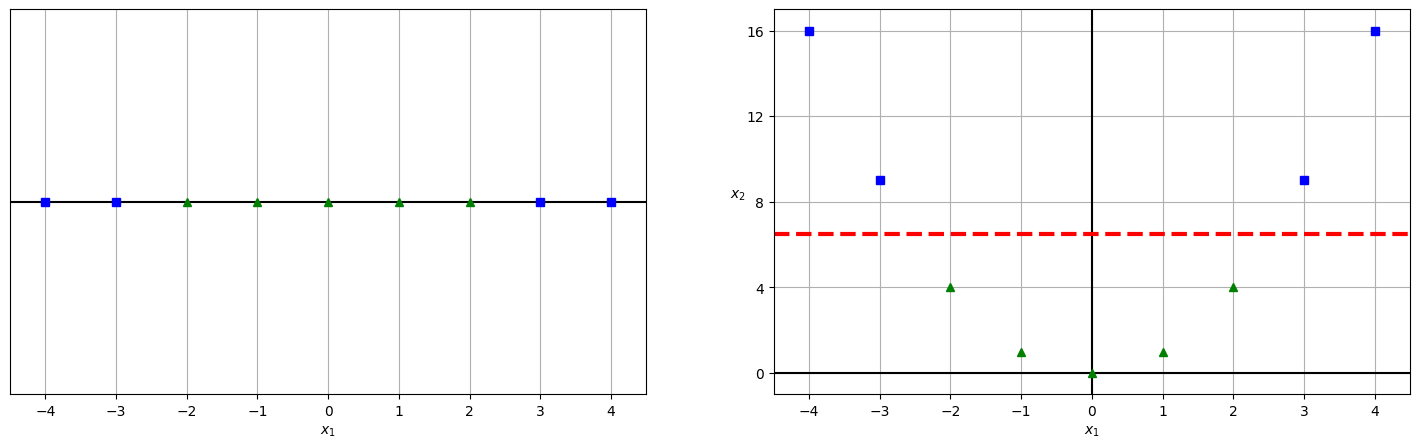

In [690]:
# extra code – this cell generates and saves Figure 5–5

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D ** 2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y == 1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis((-4.5, 4.5, -0.2, 0.2))

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], "bs")
plt.plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis((-4.5, 4.5, -1, 17))

plt.subplots_adjust(right=1)

plt.show()

To implement this idea using Scikit-Learn, you can create a pipeline containing a PolynomialFeatures transformer (discussed in “Polynomial Regression”), followed by a StandardScaler and a LinearSVC classifier. Let’s test this on the moons dataset, a toy dataset for binary classification in which the data points are shaped as two interleaving crescent moons (see Figure 5-6). You can generate this dataset using the make_moons() function:

In [691]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

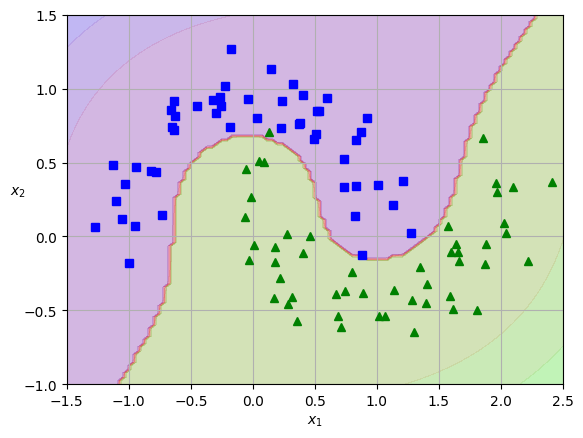

In [692]:
# extra code – this cell generates and saves Figure 5–6

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap="brg", alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap="brg", alpha=0.1)


plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# POLYNOMIAL KERNEL
Adding polynomial features is simple to implement and can work great with all sorts of machine learning algorithms (not just SVMs). That said, at a low polynomial degree this method cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the kernel trick (which is explained later in this chapter). The kernel trick makes it possible to get the same result as if you had added many polynomial features, even with a very high degree, without actually having to add them. This means there’s no combinatorial explosion of the number of features. This trick is implemented by the SVC class. Let’s test it on the moons dataset:

In [693]:

from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

This code trains an SVM classifier using a third-degree polynomial kernel, represented on the left in Figure 5-7. On the right is another SVM classifier using a 10th-degree polynomial kernel. Obviously, if your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it. The hyperparameter coef0 controls how much the model is influenced by high-degree terms versus low-degree terms.

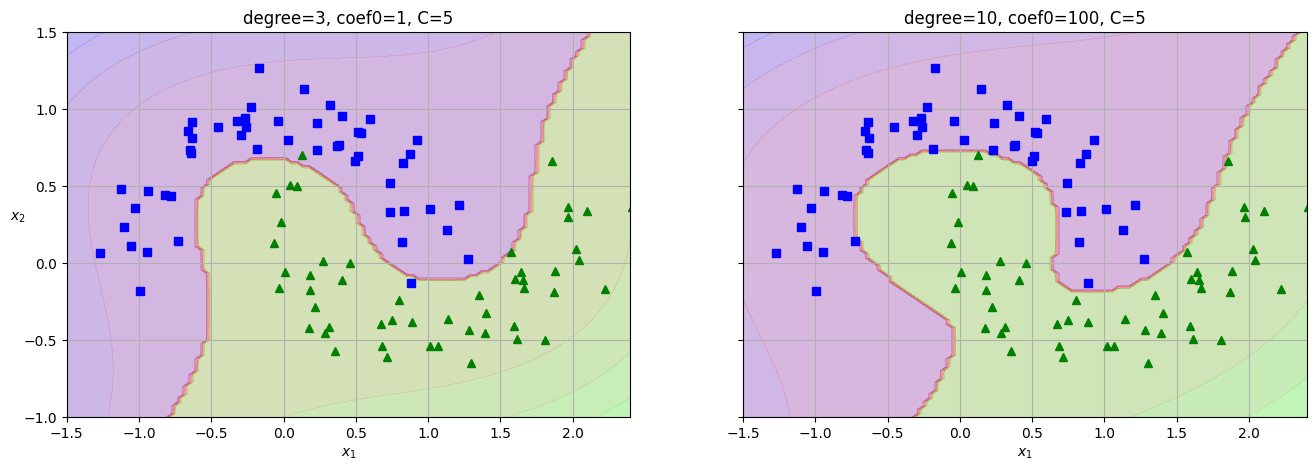

In [694]:
# extra code – this cell generates and saves Figure 5–7

poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

_, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

TIP
Although hyperparameters will generally be tuned automatically (e.g., using randomized search), it’s good to have a sense of what each hyperparameter actually does and how it may interact with other hyperparameters: this way, you can narrow the search to a much smaller space.

# SIMILARITY FEATURES
Another technique to tackle nonlinear problems is to add features computed using a similarity function, which measures how much each instance resembles a particular landmark, as we did in Chapter 2 when we added the geographic similarity features. For example, let’s take the 1D dataset from earlier and add two landmarks to it at $x_1 = –2$ and $x_1 = 1$ (see the left plot in Figure 5-8). Next, we’ll define the similarity function to be the Gaussian RBF with $\gamma = 0.3$. This is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).

Now we are ready to compute the new features. For example, let’s look at the instance $x_1 = –1$: it is located at a distance of 1 from the first landmark and 2 from the second landmark. Therefore, its new features are $x_2 = exp(–0.3 × 1^2) ≈ 0.74$ and $x_3 = exp(–0.3 × 2^2) ≈ 0.30$. The plot on the right in Figure 5-8 shows the transformed dataset (dropping the original features). As you can see, it is now linearly separable.

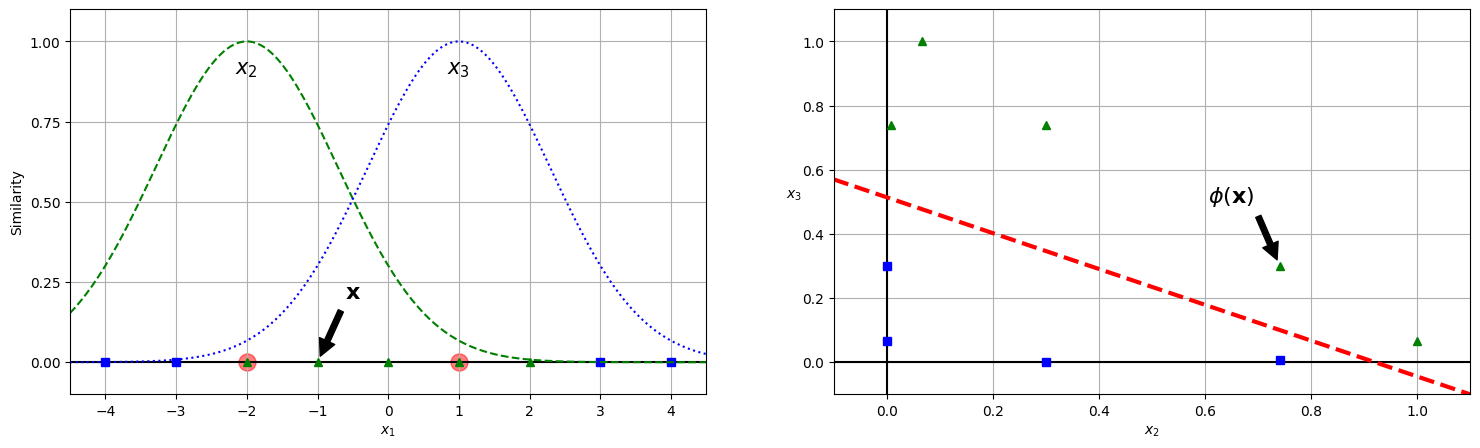

In [695]:
# extra code – this cell generates and saves Figure 5–8

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1) ** 2)


gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk == 1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis((-4.5, 4.5, -0.1, 1.1))

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk == 0], XK[:, 1][yk == 0], "bs")
plt.plot(XK[:, 0][yk == 1], XK[:, 1][yk == 1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis((-0.1, 1.1, -0.1, 1.1))

plt.subplots_adjust(right=1)

plt.show()

You may wonder how to select the landmarks. The simplest approach is to create a landmark at the location of each and every instance in the dataset. Doing that creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. The downside is that a training set with $m$ instances and $n$ features gets transformed into a training set with $m$ instances and $m$ features (assuming you drop the original features). If your training set is very large, you end up with an equally large number of features.

# GAUSSIAN RBF KERNEL
Just like the polynomial features method, the similarity features method can be useful with any machine learning algorithm, but it may be computationally expensive to compute all the additional features (especially on large training sets). Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if you had added many similarity features, but without actually doing so. Let’s try the SVC class with the Gaussian RBF kernel:

In [696]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

This model is represented at the bottom left in Figure 5-9. The other plots show models trained with different values of hyperparameters gamma ($\gamma$) and C. Increasing gamma makes the bell-shaped curve narrower (see the lefthand plots in Figure 5-8). As a result, each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother. So $\gamma$ acts like a regularization hyperparameter: if your model is overfitting, you should reduce $\gamma$; if it is underfitting, you should increase $\gamma$ (similar to the C hyperparameter).

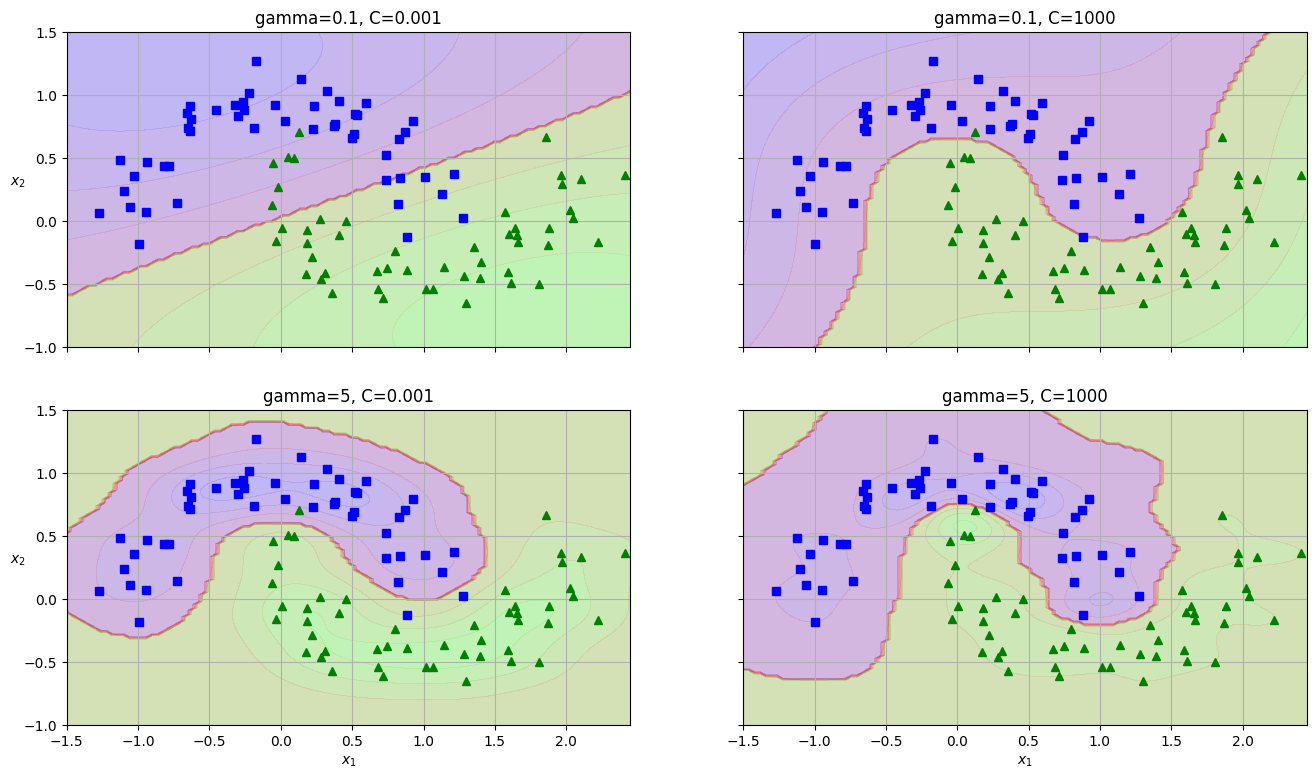

In [697]:
# extra code – this cell generates and saves Figure 5–9

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

Other kernels exist but are used much more rarely. Some kernels are specialized for specific data structures. String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance).

TIP
With so many kernels to choose from, how can you decide which one to use? As a rule of thumb, you should always try the linear kernel first. The LinearSVC class is much faster than SVC(kernel="linear"), especially if the training set is very large. If it is not too large, you should also try kernelized SVMs, starting with the Gaussian RBF kernel; it often works really well. Then, if you have spare time and computing power, you can experiment with a few other kernels using hyperparameter search. If there are kernels specialized for your training set’s data structure, make sure to give them a try too.

# COMPUTATIONAL COMPLEXITY OF SVM
The LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear SVMs. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features. Its training time complexity is roughly $O(m × n)$. The algorithm takes longer if you require very high precision. This is controlled by the tolerance hyperparameter $\epsilon$ (called tol in Scikit-Learn). In most classification tasks, the default tolerance is fine.

The SVC class is based on the libsvm library, which implements an algorithm that supports the kernel trick. The training time complexity is usually between $O(m^2 × n)$ and $O(m^3 × n)$. Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large (e.g., hundreds of thousands of instances), so this algorithm is best for small or medium-sized nonlinear training sets. It scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features). In this case, the algorithm scales roughly with the average number of nonzero features per instance.

The SGDClassifier class also performs large margin classification by default, and its hyperparameters–especially the regularization hyperparameters (alpha and penalty) and the learning_rate–can be adjusted to produce similar results as the linear SVMs. For training it uses stochastic gradient descent (see Chapter 4), which allows incremental learning and uses little memory, so you can use it to train a model on a large dataset that does not fit in RAM (i.e., for out-of-core learning). Moreover, it scales very well, as its computational complexity is $O(m × n)$. Table 5-1 compares Scikit-Learn’s SVM classification classes.

Table 5-1. Comparison of Scikit-Learn classes for SVM classification:

| Class           | Time complexity              | Out-of-core support | Scaling required | Kernel trick |
|-----------------|------------------------------| --- | --- | --- |
| $LinearSVC$     | $O(m × n)$                   | No | Yes | No |
| $SVC$           | $O(m^2 × n)$ to $O(m^3 × n)$ | No | Yes | Yes |
| $SGDClassifier$ | $O(m × n)$                   | Yes | Yes | No |


# SVM REGRESSION
To use SVMs for regression instead of classification, the trick is to tweak the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter, $\epsilon$. Figure 5-10 shows two linear SVM regression models trained on some linear data, one with a small margin ($\epsilon$ = 0.5) and the other with a larger margin ($\epsilon$ = 1.2).

In [698]:
from sklearn.svm import LinearSVR

# extra code – these 3 lines generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

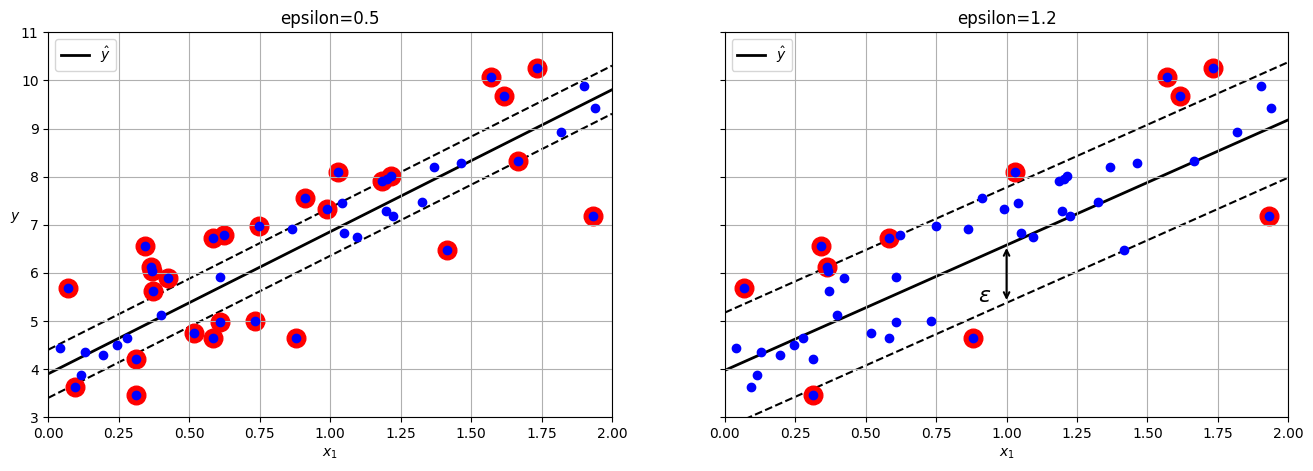

In [699]:
# extra code – this cell generates and saves Figure 5–10

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)


def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#FF0000', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)


svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
    '', xy=(eps_x1, eps_y_pred), xycoords='data',
    xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
    textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
)
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
plt.show()

Reducing $\epsilon$ increases the number of support vectors, which regularizes the model. Moreover, if you add more training instances within the margin, it will not affect the model’s predictions; thus, the model is said to be $\epsilon$-insensitive.

You can use Scikit-Learn’s LinearSVR class to perform linear SVM regression. The following code produces the model represented on the left in Figure 5-10:

To tackle nonlinear regression tasks, you can use a kernelized SVM model. Figure 5-11 shows SVM regression on a random quadratic training set, using a second-degree polynomial kernel. There is some regularization in the left plot (i.e., a small C value), and much less in the right plot (i.e., a large C value).

The following code uses Scikit-Learn’s SVR class (which supports the kernel trick) to produce the model represented on the left in Figure 5-11:

In [700]:
from sklearn.svm import SVR

# extra code – these 3 lines generate a simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

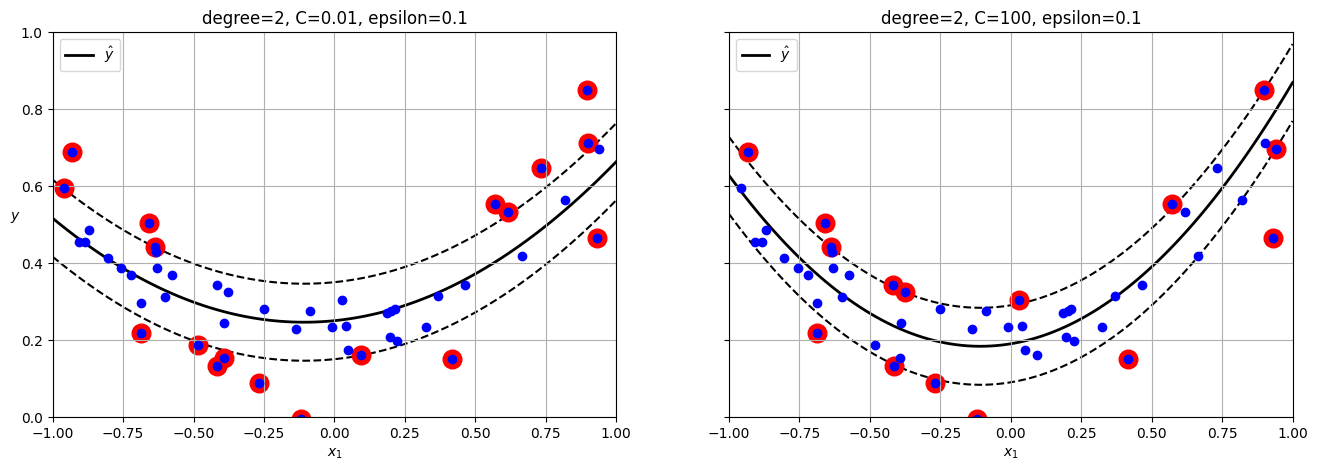

In [701]:
# extra code – this cell generates and saves Figure 5–11

svm_poly_reg2 = make_pipeline(StandardScaler(),
                              SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

_, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class. The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class), while the SVR class gets much too slow when the training set grows very large (just like the SVC class).

NOTE
SVMs can also be used for novelty detection, as you will see in Chapter 9.

The rest of this chapter explains how SVMs make predictions and how their training algorithms work, starting with linear SVM classifiers. If you are just getting started with machine learning, you can safely skip this and go straight to the exercises at the end of this chapter, and come back later when you want to get a deeper understanding of SVMs.

# UNDER THE HOOD
A linear SVM classifier predicts the class of a new instance $x$ by first computing the decision function $θ^T x = θ_0 x_0 + ⋯ + θ_n x_n$, where $x_0$ is the bias feature (always equal to 1). If the result is positive, then the predicted class ŷ is the positive class (1); otherwise it is the negative class (0). This is exactly like LogisticRegression (discussed in Chapter 4).


NOTE
Up to now, I have used the convention of putting all the model parameters in one vector $\theta$, including the bias term $\theta_0$ and the input feature weights $\theta_1$ to $\theta_n$. This required adding a bias input $x_0 = 1$ to all instances. Another very common convention is to separate the bias term $b$ (equal to $\theta_0$) and the feature weights vector $w$ (containing $\theta_1$ to $\theta_n$). In this case, no bias feature needs to be added to the input feature vectors, and the linear SVM’s decision function is equal to $w^T x + b = w_1 x_1 + ⋯ + w_n x_n + b$. I will use this convention throughout the rest of this book.

So, making predictions with a linear SVM classifier is quite straightforward. How about training? This requires finding the weights vector $w$ and the bias term $b$ that make the street, or margin, as wide as possible while limiting the number of margin violations. Let’s start with the width of the street: to make it larger, we need to make $w$ smaller. This may be easier to visualize in 2D, as shown in Figure 5-12. Let’s define the borders of the street as the points where the decision function is equal to –1 or +1. In the left plot the weight $w_1$ is 1, so the points at which $w_1 x_1 = –1$ or $+1$ are $x_1 = –1$ and $+1$: therefore the margin’s size is 2. In the right plot the weight is 0.5, so the points at which $w_1 x_1 = –1$ or $+1$ are $x_1 = –2$ and $+2$: the margin’s size is 4. So, we need to keep $w$ as small as possible. Note that the bias term $b$ has no influence on the size of the margin: tweaking it just shifts the margin around, without affecting its size.

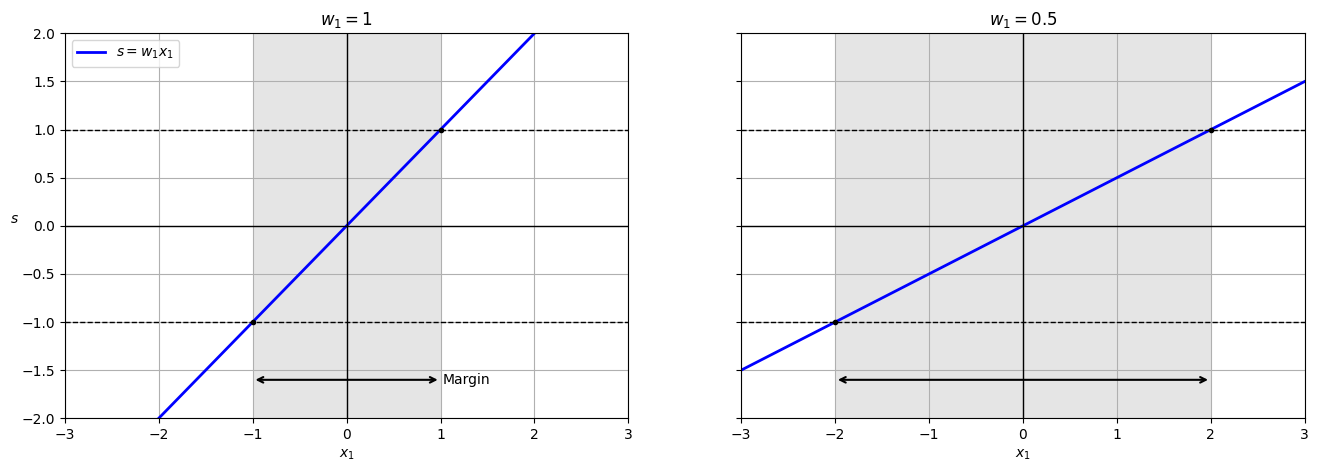

In [702]:
# extra code – this cell generates and saves Figure 5–12

import matplotlib.patches as patches


def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    half_margin = 1 / w

    plt.plot(x1, y, "b-", linewidth=2, label=r"$s = w_1 x_1$")
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    plt.gca().add_patch(rect)
    plt.plot([-3, 3], [1, 1], "k--", linewidth=1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth=1)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel("$s$", rotation=0, labelpad=5)
        plt.legend()
        plt.text(1.02, -1.6, "Margin", ha="left", va="center", color="k")

    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )
    plt.title(f"$w_1 = {w}$")


_, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.grid()
plt.show()

We also want to avoid margin violations, so we need the decision function to be greater than 1 for all positive training instances and lower than –1 for negative training instances. If we define $t^{(i)} = –1$ for negative instances (when $y^{(i)} = 0$) and $t^{(i)} = 1$ for positive instances (when $y^{(i)} = 1$), then we can write this constraint as $t^{(i)}(w^T x^{(i)} + b) ≥ 1$ for all instances.

We can therefore express the hard margin linear SVM classifier objective as the constrained optimization problem in Equation 5-1.

For your info, I was checking with GPT4 if there is some difference in the style of transpose operator. (Here on example of weight vector w). Here is the answer:

All three notations are correct and interchangeable:
- $\mathbf{w}^T$ — This is the most common and universally understood notation for transpose.
- $\mathbf{w}^\top$ — This is less common than $T$, but is still widely recognized.
- $\mathbf{w}^\intercal$ — This is less frequently used but is a valid and correct notation for transpose.



Equation 5-1. Hard margin linear SVM classifier objective

$\underset{w, b}{\text{minimize}} \frac{1}{2} \mathbf{w}^\intercal \mathbf{w}$ \
subject to $t^{(i)}(\mathbf{w}^\intercal \mathbf{x}^{(i)} + b) \ge 1$ for $i = 1, 2, \dots, m$


We are minimizing $\frac{1}{2} \mathbf{w}^\top \mathbf{w}$, which is equal to $\frac{1}{2} \|\mathbf{w}\|^2$, rather than minimizing $\|\mathbf{w}\|$ (the norm of $\mathbf{w}$). Indeed, $\frac{1}{2} \|\mathbf{w}\|^2$ has a nice, simple derivative (it is just $\mathbf{w}$), while $\|\mathbf{w}\|$ is not differentiable at $\mathbf{w} = 0$. Optimization algorithms often work much better on differentiable functions.


To get the soft margin objective, we need to introduce a slack variable $ \zeta^{(i)} \geq 0$ for each instance: $ \zeta^{(i)}$ measures how much the $ i^{th}$ instance is allowed to violate the margin. We now have two conflicting objectives: make the slack variables as small as possible to reduce the margin violations, and make $ \frac{1}{2} \mathbf{w}^\top \mathbf{w}$ as small as possible to increase the margin. This is where the $ C$ hyperparameter comes in: it allows us to define the trade-off between these two objectives. This gives us the constrained optimization problem in Equation 5-2.


Equation 5-2. Soft margin linear SVM classifier objective

$\underset{w, b, \zeta}{\text{minimize}} \frac{1}{2} \mathbf{w}^\intercal \mathbf{w} + C \sum_{i=1}^m \zeta^{(i)}$ \
subject to $t^{(i)}(\mathbf{w}^\intercal \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)}$ and $\zeta^{(i)} \ge 0$

The hard margin and soft margin problems are both convex quadratic optimization problems with linear constraints. Such problems are known as quadratic programming (QP) problems. Many off-the-shelf solvers are available to solve QP problems by using a variety of techniques that are outside the scope of this book.

Using a QP solver is one way to train an SVM. Another is to use gradient descent to minimize the hinge loss or the squared hinge loss (see Figure 5-13). Given an instance $x$ of the positive class (i.e., with $t = 1$), the loss is 0 if the output s of the decision function $(s = w^T x + b)$ is greater than or equal to 1. This happens when the instance is off the street and on the positive side. Given an instance of the negative class (i.e., with $t = –1$), the loss is 0 if $s ≤ –1$. This happens when the instance is off the street and on the negative side. The further away an instance is from the correct side of the margin, the higher the loss: it grows linearly for the hinge loss, and quadratically for the squared hinge loss. This makes the squared hinge loss more sensitive to outliers. However, if the dataset is clean, it tends to converge faster. By default, LinearSVC uses the squared hinge loss, while SGDClassifier uses the hinge loss. Both classes let you choose the loss by setting the loss hyperparameter to "hinge" or "squared_hinge". The SVC class’s optimization algorithm finds a similar solution as minimizing the hinge loss.

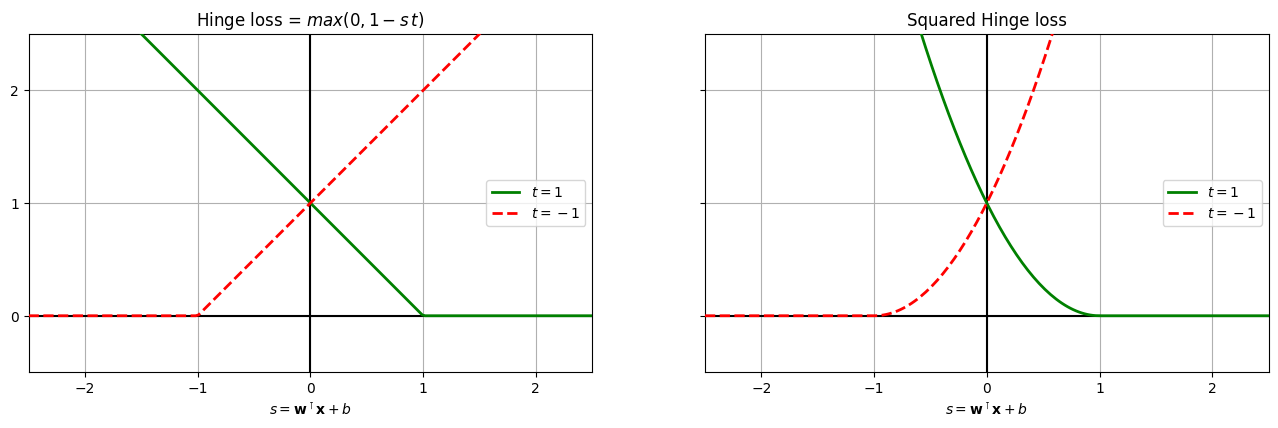

In [703]:
# extra code – this cell generates and saves Figure 5–13

s = np.linspace(-2.5, 2.5, 200)
hinge_pos = np.where(1 - s < 0, 0, 1 - s)  # max(0, 1 - s)
hinge_neg = np.where(1 + s < 0, 0, 1 + s)  # max(0, 1 + s)

titles = (r"Hinge loss = $max(0, 1 - s\,t)$", "Squared Hinge loss")

fix, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 5))

for ax, loss_pos, loss_neg, title in zip(
        axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):
    ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")
    ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")
    ax.axis([-2.5, 2.5, -0.5, 2.5])
    ax.legend(loc="center right")
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 2.5, 1))
    ax.set_aspect("equal")

plt.show()

# THE DUAL PROBLEM
Given a constrained optimization problem, known as the primal problem, it is possible to express a different but closely related problem, called its dual problem. The solution to the dual problem typically gives a lower bound to the solution of the primal problem, but under some conditions it can have the same solution as the primal problem. Luckily, the SVM problem happens to meet these conditions,⁠5 so you can choose to solve the primal problem or the dual problem; both will have the same solution. Equation 5-3 shows the dual form of the linear SVM objective. If you are interested in knowing how to derive the dual problem from the primal problem, see the extra material section in this chapter’s notebook.

Equation 5-3. Dual form of the linear SVM objective

$\max_{\alpha} \left( \sum_{i=1}^{m} \alpha^{(i)} - \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} \langle x^{(i)}, x^{(j)} \rangle \right)$

subject to:

$\alpha^{(i)} \geq 0 \text{ for all } i = 1, \ldots, m$

and

$\sum_{i=1}^{m} \alpha^{(i)} t^{(i)} = 0$

Once you find the vector $\hat{\alpha}$ that minimizes this equation (using a QP solver), use Equation 5-4 to compute the $\hat{w}$ and $\hat{b}$ that minimize the primal problem. In this equation, $n_s$ represents the number of support vectors.


Equation 5-4. From the dual solution to the primal solution

$\mathbf{\hat{w}} = \sum_{i=1}^{m} \hat{\alpha}^{(i)} t^{(i)} \mathbf{x}^{(i)}$ \
$\hat{b} = \frac{1}{n_s} \sum_{\substack{\text{i=1} \\ \text{\hat{\alpha}^{(i)}>0}}}^{m} (t^{(i)} - \mathbf{\hat{w}}^\top \mathbf{x}^{(i)})$

The dual problem is faster to solve than the primal one when the number of training instances is smaller than the number of features. More importantly, the dual problem makes the kernel trick possible, while the primal problem does not. So what is this kernel trick, anyway?

In [704]:
#todo: continue from here

# KERNELIZED SVM

Suppose you want to apply a second-degree polynomial transformation to a two-dimensional training set (such as the moons training set), then train a linear SVM classifier on the transformed training set. Equation 5-5 shows the second-degree polynomial mapping function $\phi$ that you want to apply.

Equation 5-5. Second-degree polynomial mapping

$\phi(\mathbf{x}) = \phi\left(\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}\right) = \begin{bmatrix} x_1^2 \\ \sqrt{2} x_1 x_2 \\ x_2^2 \end{bmatrix}$

Notice that the transformed vector is 3D instead of 2D. Now let’s look at what happens to a couple of 2D vectors, $a$ and $b$, if we apply this second-degree polynomial mapping and then compute the dot product of the transformed vectors (see Equation 5-6).

Equation 5-6. Kernel trick for a second-degree polynomial mapping

$\phi(\mathbf{a})^\intercal \phi(\mathbf{b})$\
$= \begin{bmatrix} a_1^2 \\ \sqrt{2} a_1 a_2 \\ a_2^2 \end{bmatrix}^\intercal \begin{bmatrix} b_1^2 \\ \sqrt{2} b_1 b_2 \\ b_2^2 \end{bmatrix}$\
$= a_1^2 b_1^2 + 2 a_1 b_1 a_2 b_2 + a_2^2 b_2^2$\
$= (a_1 b_1 + a_2 b_2)^2$\
$= (\mathbf{a}^\intercal \mathbf{b})^2$

How about that? The dot product of the transformed vectors is equal to the square of the dot product of the original vectors: $\boldsymbol{\phi}(\mathbf{a})^\top \boldsymbol{\phi}(\mathbf{b}) = (\mathbf{a}^\top \mathbf{b})^2$.

Here is the key insight: if you apply the transformation $\boldsymbol{\phi}$ to all training instances, then the dual problem (see Equation 5-3) will contain the dot product $\boldsymbol{\phi}(\mathbf{x}^{(i)})^\top \boldsymbol{\phi}(\mathbf{x}^{(j)})$. But if $\boldsymbol{\phi}$ is the second-degree polynomial transformation defined in Equation 5-5, then you can replace this dot product of transformed vectors simply by $(\mathbf{x}^{(i)^\top} \mathbf{x}^{(j)})^2$. So, you don’t need to transform the training instances at all; just replace the dot product by its square in Equation 5-3. The result will be strictly the same as if you had gone through the trouble of transforming the training set and then fitting a linear SVM algorithm, but this trick makes the whole process much more computationally efficient.

The function $K(\mathbf{a}, \mathbf{b}) = (\mathbf{a}^\top \mathbf{b})^2$ is a second-degree polynomial kernel. In machine learning, a kernel is a function capable of computing the dot product $\boldsymbol{\phi}(\mathbf{a})^\top \boldsymbol{\phi}(\mathbf{b})$, based only on the original vectors $\mathbf{a}$ and $\mathbf{b}$, without having to compute (or even to know about) the transformation $\boldsymbol{\phi}$. Equation 5-7 lists some of the most commonly used kernels.


Equation 5-7. Commonly used kernels

Linear: $K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^\intercal \mathbf{b}$
Polynomial: $K(\mathbf{a}, \mathbf{b}) = (\gamma \mathbf{a}^\intercal \mathbf{b} + r)^d$
Gaussian RBF: $K(\mathbf{a}, \mathbf{b}) = \exp(-\gamma \|\mathbf{a} - \mathbf{b}\|^2)$
Sigmoid: $K(\mathbf{a}, \mathbf{b}) = \tanh(\gamma \mathbf{a}^\intercal \mathbf{b} + r)$

MERCER’S THEOREM

According to Mercer’s theorem, if a function $K(a, b)$ respects a few mathematical conditions called Mercer’s conditions (e.g., $K$ must be continuous and symmetric in its arguments so that $K(a, b) = K(b, a)$, etc.), then there exists a function $\phi$ that maps $a$ and $b$ into another space (possibly with much higher dimensions) such that $K(a, b) = \phi(a)^{\intercal} \phi(b)$. You can use $K$ as a kernel because you know $\phi$ exists, even if you don’t know what $\phi$ is. In the case of the Gaussian RBF kernel, it can be shown that $\phi$ maps each training instance to an infinite-dimensional space, so it’s a good thing you don’t need to actually perform the mapping!

Note that some frequently used kernels (such as the sigmoid kernel) don’t respect all of Mercer’s conditions, yet they generally work well in practice.

There is still one loose end we must tie up. Equation 5-4 shows how to go from the dual solution to the primal solution in the case of a linear SVM classifier. But if you apply the kernel trick, you end up with equations that include ϕ(x(i)). In fact, 
 must have the same number of dimensions as ϕ(x(i)), which may be huge or even infinite, so you can’t compute it. But how can you make predictions without knowing 
? Well, the good news is that you can plug the formula for 
 from Equation 5-4 into the decision function for a new instance x(n), and you get an equation with only dot products between input vectors. This makes it possible to use the kernel trick (Equation 5-8).

There is still one loose end we must tie up. Equation 5-4 shows how to go from the dual solution to the primal solution in the case of a linear SVM classifier. But if you apply the kernel trick, you end up with equations that include $\phi(x^{(i)})$. In fact, $\hat{w}$ must have the same number of dimensions as $\phi(x^{(i)})$, which may be huge or even infinite, so you can’t compute it. But how can you make predictions without knowing $\hat{w}$? Well, the good news is that you can plug the formula for $\hat{w}$ from Equation 5-4 into the decision function for a new instance $x^{(n)}$, and you get an equation with only dot products between input vectors. This makes it possible to use the kernel trick (Equation 5-8).

k
$= \sum_{i=1}^{m} \hat{\alpha}^{(i)} t^{(i)} \left(\boldsymbol{\phi}(\mathbf{x}^{(i)})\right)^T \boldsymbol{\phi}(\mathbf{x}^{(n)}) + \hat{b}$


Equation 5-8. Making predictions with a kernelized SVM

$h_{\hat{\mathbf{w}}, \hat{b}}(\boldsymbol{\phi}(\mathbf{x}^{(n)}))$\
$= \hat{\mathbf{w}}^T \boldsymbol{\phi}(\mathbf{x}^{(n)}) + \hat{b}$\
$= \left( \sum_{i=1}^{m} \hat{\alpha}^{(i)} t^{(i)} \boldsymbol{\phi}(\mathbf{x}^{(i)})\right)^T \boldsymbol{\phi}(\mathbf{x}^{(n)}) + \hat{b}$\
$= \sum_{i=1}^{m} \hat{\alpha}^{(i)} t^{(i)} \left(\boldsymbol{\phi}(\mathbf{x}^{(i)})^T \boldsymbol{\phi}(\mathbf{x}^{(n)}) \right) + \hat{b}$
$= \sum_{\substack{i=1 \\ \hat{\alpha}^{(i)} > 0}}^{m} \hat{\alpha}^{(i)} t^{(i)} K(\mathbf{x}^{(i)}, \mathbf{x}^{(n)}) + \hat{b}$

Note that since $\alpha^{(i)} \neq 0$ only for support vectors, making predictions involves computing the dot product of the new input vector $x^{(n)}$ with only the support vectors, not all the training instances. Of course, you need to use the same trick to compute the bias term $b$ (Equation 5-9).

Equation 5-9. Bias term for a kernelized SVM classifier

$\hat{b}$\
$= \frac{1}{n_s} \sum_{\substack{i=1 \\ \hat{\alpha}^{(i)} > 0}}^{m} \left( t^{(i)} - \hat{\mathbf{w}}^T \boldsymbol{\phi}(\mathbf{x}^{(i)}) \right)$\
$= \frac{1}{n_s} \sum_{\substack{i=1 \\ \hat{\alpha}^{(i)} > 0}}^{m} \left( t^{(i)} - \left( \sum_{j=1}^{m} \hat{\alpha}^{(j)} t^{(j)} \boldsymbol{\phi}(\mathbf{x}^{(j)})\right)^T \boldsymbol{\phi}(\mathbf{x}^{(i)}) \right)$
$= \frac{1}{n_s} \sum_{\substack{i=1 \\ \hat{\alpha}^{(i)} > 0}}^{m} \left( t^{(i)} - \sum_{\substack{j=1 \\ \hat{\alpha}^{(j)} > 0}}^{m} \hat{\alpha}^{(j)} t^{(j)} K(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) \right)$

If you are starting to get a headache, that’s perfectly normal: it’s an unfortunate side effect of the kernel trick

Linear SVM classifier cost function:

$J(\mathbf{w}, b)$\
$= \frac{1}{2} \mathbf{w}^\intercal \mathbf{w} + C \sum_{i=1}^m \zeta^{(i)}$
$= \frac{1}{2} \mathbf{w}^\intercal \mathbf{w} + C \sum_{i=1}^m \max\left(0, 1 - t^{(i)}(\mathbf{w}^\intercal \mathbf{x}^{(i)} + b)\right)$

NOTE
It is also possible to implement online kernelized SVMs, capable of incremental learning, as described in the papers “Incremental and Decremental Support Vector Machine Learning” and “Fast Kernel Classifiers with Online and Active Learning”. These kernelized SVMs are implemented in Matlab and C++. But for large-scale nonlinear problems, you may want to consider using random forests (see Chapter 7) or neural networks (see Part II).

# EXTRA MATERIALS / EXERCISES

#### LINEAR SVM CLASSIFIER IMPLEMENTATION USING BATCH GRADIENT DESCENT

In [705]:


X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

In [706]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000,
                 random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # n feature weights
        b = 0

        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1
        X_t = X * t
        self.Js = []

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * (w * w).sum() + self.C * ((1 - X_t_sv.dot(w)).sum() - b * t_sv.sum())
            self.Js.append(J)

            w_gradient_vector = w - self.C * X_t_sv.sum(axis=0).reshape(-1, 1)
            b_derivative = -self.C * t_sv.sum()
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return self.decision_function(X) >= 0

In [707]:
C = 2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000,
                      random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[ True],
       [False]])

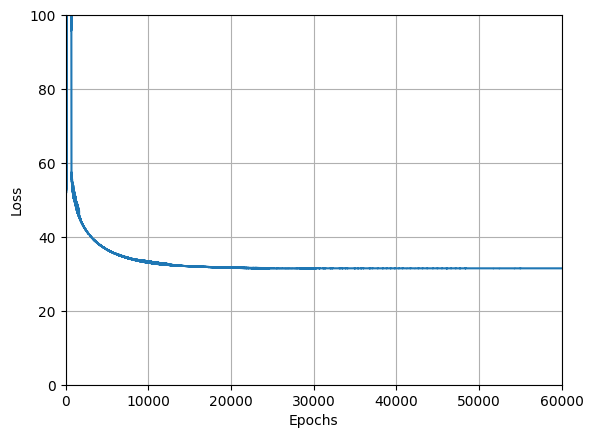

In [708]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [709]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [710]:

svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


C:\Users\lazni\AppData\Local\Temp\ipykernel_14508\1700778358.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svm_clf2.fit(X, y.ravel())


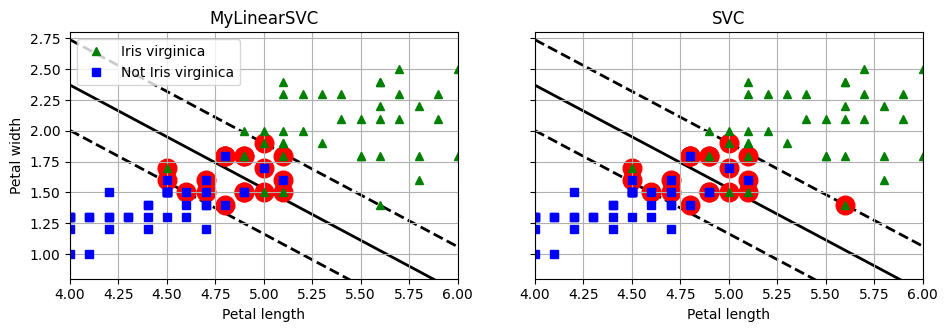

In [711]:
yr = y.to_numpy()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("MyLinearSVC")
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length")
plt.title("SVC")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()

[-12.52988101   1.94162342   1.84544824]


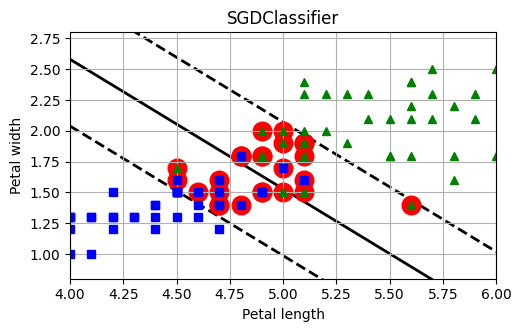

In [712]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3,
                        random_state=42)
sgd_clf.fit(X, y)

m = len(X)
t = np.array(y).reshape(-1, 1) * 2 - 1  # -1 if y == 0, or +1 if y == 1
X_b = np.c_[np.ones((m, 1)), X]  # Add bias input x0=1
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5, 3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("SGDClassifier")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()

In [713]:
# ---------------------------------------------------------------------------------------------------------------------

1. The fundamental idea behind Support Vector Machines is to fit the widest possible "street" between the classes. In other words, the goal is to have the largest possible margin between the decision boundary that separates the two classes and the training instances. When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible street (i.e., a few instances may end up on the street). Another key idea is to use kernels when training on nonlinear datasets. SVMs can also be tweaked to perform linear and nonlinear regression, as well as novelty detection.
2. After training an SVM, a support vector is any instance located on the "street" (see the previous answer), including its border. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., is off the street) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street they won't affect the decision boundary. Computing the predictions with a kernelized SVM only involves the support vectors, not the whole training set.
3. SVMs try to fit the largest possible "street" between the classes (see the first answer), so if the training set is not scaled, the SVM will tend to neglect small features (see Figure 5–2).
4. You can use the decision_function() method to get confidence scores. These scores represent the distance between the instance and the decision boundary. However, they cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVC, then at the end of training it will use 5-fold cross-validation to generate out-of-sample scores for the training samples, and it will train a LogisticRegression model to map these scores to estimated probabilities. The predict_proba() and predict_log_proba() methods will then be available.
5. All three classes can be used for large-margin linear classification. The SVC class also supports the kernel trick, which makes it capable of handling nonlinear tasks. However, this comes at a cost: the SVC class does not scale well to datasets with many instances. It does scale well to a large number of features, though. The LinearSVC class implements an optimized algorithm for linear SVMs, while SGDClassifier uses Stochastic Gradient Descent. Depending on the dataset LinearSVC may be a bit faster than SGDClassifier, but not always, and SGDClassifier is more flexible, plus it supports incremental learning.
6. If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularization. To decrease it, you need to increase gamma or C (or both).
7. A Regression SVM model tries to fit as many instances within a small margin around its predictions. If you add instances within this margin, the model will not be affected at all: it is said to be ϵ-insensitive.
8. The kernel trick is mathematical technique that makes it possible to train a nonlinear SVM model. The resulting model is equivalent to mapping the inputs to another space using a nonlinear transformation, then training a linear SVM on the resulting high-dimensional inputs. The kernel trick gives the same result without having to transform the inputs at all.

In [714]:
# ---------------------------------------------------------------------------------------------------------------------

In [715]:
# 9. TRAIN A LINEAR SVC ON A LINEARLY SEPARABLE DATASET. 
# THEN TRAIN A SVC AND A SGDCLASSIFIER ON THE SAME DATASET. SEE IF YOU CAN GET THEM TO PRODUCE ROUGHLY THE SAME MODEL.

# Let's use the iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable.

from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Now let's build and train 3 models:

Remember that LinearSVC uses loss="squared_hinge" by default, so if we want all 3 models to produce similar results, we need to set loss="hinge".
Also, the SVC class uses an RBF kernel by default, so we need to set kernel="linear" to get similar results as the other two models.
Lastly, the SGDClassifier class does not have a C hyperparameter, but it has another regularization hyperparameter called alpha, so we can tweak it to get similar results as the other two models.

In [716]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

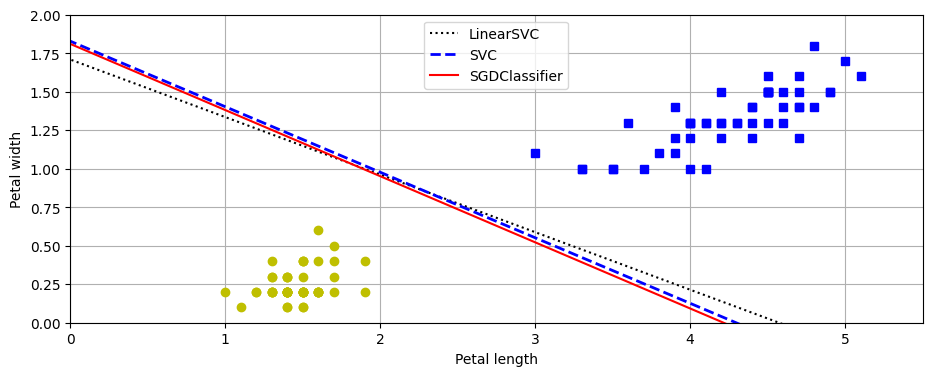

In [717]:
# Let's plot the decision boundaries of these three models:

def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

In [718]:
# ---------------------------------------------------------------------------------------------------------------------

In [719]:
# Exercise: Train an SVM classifier on the Wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 3 classes. What accuracy can you reach?

# First, let's fetch the dataset, look at its description, then split it into a training set and a test set:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [720]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [721]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42)

In [722]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [723]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int32


Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do to handle multiple classes. Easy, right?

In [724]:
lin_clf = LinearSVC(dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, random_state=42)

Oh no! It failed to converge. Can you guess why? Do you think we must just increase the number of training iterations? Let's see:

In [725]:
lin_clf = LinearSVC(max_iter=1_000_000, dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, max_iter=1000000, random_state=42)

Even with one million iterations, it still did not converge. There must be another problem.

Let's still evaluate this model with cross_val_score, it will serve as a baseline:

In [726]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

0.90997150997151

Well 91% accuracy on this dataset is not great. So did you guess what the problem is?

That's right, we forgot to scale the features! Always remember to scale the features when using SVMs:

In [727]:
lin_clf = make_pipeline(StandardScaler(),
                        LinearSVC(dual=True, random_state=42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=True, random_state=42))])

Now it converges without any problem. Let's measure its performance:

In [728]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775

Nice! We get 97.7% accuracy, that's much better.

Let's see if a kernelized SVM will do better. We will use a default SVC for now:

In [729]:
svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
cross_val_score(svm_clf, X_train, y_train).mean()

0.9698005698005698

That's not better, but perhaps we need to do a bit of hyperparameter tuning:

In [730]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=9.925589984899778, gamma=0.011986281799901188,
                     random_state=42))])

In [731]:
rnd_search_cv.best_score_

0.9925925925925926

Ah, this looks excellent! Let's select this model. Now we can test it on the test set:

In [732]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

This tuned kernelized SVM performs better than the LinearSVC model, but we get a lower score on the test set than we measured using cross-validation. This is quite common: since we did so much hyperparameter tuning, we ended up slightly overfitting the cross-validation test sets. It's tempting to tweak the hyperparameters a bit more until we get a better result on the test set, but this would probably not help, as we would just start overfitting the test set. Anyway, this score is not bad at all, so let's stop here.

In [733]:
# ---------------------------------------------------------------------------------------------------------------------

In [734]:
# Exercise: Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2. The original dataset can be fetched using sklearn.datasets.fetch_california_housing(). The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use much less instances (e.g., 2,000), to test many more hyperparameter combinations. What is your best model's RMSE?

# Let's load the dataset:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

In [735]:
# Now let's split the dataset into a training set and a test set. We will also scale the features:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
from sklearn.svm import LinearSVR

lin_svr = make_pipeline(StandardScaler(), LinearSVR(dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(dual=True, random_state=42))])

It did not converge, so let's increase max_iter:

In [736]:
lin_svr = make_pipeline(StandardScaler(),
                        LinearSVR(max_iter=5000, dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=5000, random_state=42))])

Let's see how it performs on the training set:

In [737]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.9595484665813285

In [738]:
# Let's see the RMSE:
np.sqrt(mse)

0.979565447829459

In this dataset, the targets represent hundreds of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors close to $98,000! Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for C and gamma:

In [739]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_reg = make_pipeline(StandardScaler(), SVR())

param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_reg, param_distrib,
                                   n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D529AB2850>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D5261A05D0>},
                   random_state=42)

In [740]:
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485979))])

In [741]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

Looks much better than the linear model. Let's select this model and evaluate it on the test set:

In [742]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.5854732265172239

So SVMs worked very well on the Wine dataset, but not so much on the California Housing dataset. In Chapter 2, we found that Random Forests worked better for that dataset.